In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Preprocessing on train set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [4]:
# Preprocessing on test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [5]:
# Create the CNN model
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(64,64,3))) # 1. Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2)) # 2. Pooling 1
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten()) # 3. Flatten
cnn.add(tf.keras.layers.Dense(units=128,activation="relu")) # 4. Full connection
cnn.add(tf.keras.layers.Dense(units=1,activation="sigmoid")) # 5. Output layer
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"]) # Compile the CNN model

In [29]:
r = cnn.fit(x=training_set,validation_data=test_set,epochs=15)

Epoch 1/15
250/250 [==============================] - 41s 165ms/step - loss: 0.2675 - accuracy: 0.8861 - val_loss: 0.5714 - val_accuracy: 0.7875
Epoch 2/15
250/250 [==============================] - 43s 171ms/step - loss: 0.2480 - accuracy: 0.8954 - val_loss: 0.5337 - val_accuracy: 0.8040
Epoch 3/15
250/250 [==============================] - 47s 188ms/step - loss: 0.2452 - accuracy: 0.9009 - val_loss: 0.5216 - val_accuracy: 0.7960
Epoch 4/15
250/250 [==============================] - 46s 184ms/step - loss: 0.2325 - accuracy: 0.9007 - val_loss: 0.5529 - val_accuracy: 0.7940
Epoch 5/15
250/250 [==============================] - 47s 189ms/step - loss: 0.2276 - accuracy: 0.9054 - val_loss: 0.5437 - val_accuracy: 0.7935
Epoch 6/15
250/250 [==============================] - 47s 186ms/step - loss: 0.2099 - accuracy: 0.9149 - val_loss: 0.5523 - val_accuracy: 0.7915
Epoch 7/15
250/250 [==============================] - 48s 193ms/step - loss: 0.2093 - accuracy: 0.9149 - val_loss: 0.5822 - val_ac

In [30]:
cnn.save("models/cat-dog-classification.h5")

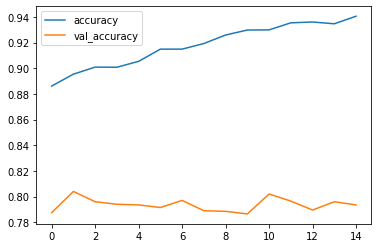

In [34]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend();